# Assignment 1

For the first assignment we need to build a predictive model to predict the target based on a dataset provided by a Belgian bank-insurer that contains customer information for retail clients over the age of 18. The goal is  to  predict is  which consumers will leave. Here we encounter the problem of class imbalance that makes classification more difficult. Because the number of churners is less than 5%, the dataset is unbalanced. Throughout the training process, some sampling approaches, such as oversampling, undersampling, or smart sampling, as well as measures other than accuracy, are required.

In [108]:
#packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import RandomOverSampler,SMOTE,ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix, classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.ensemble import AdaBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier
#Own .py-scripts
%run models_functions.py

https://dorukkilitcioglu.com/2018/08/11/pca-decision-tree.html

Why you should use PCA before Decision Trees

In [2]:
# Import data from CSV-files
train_month_1 = pd.read_csv('data/train_month_1.csv', sep=",", header=0)
train_month_2 = pd.read_csv('data/train_month_2.csv', sep=",", header=0)
train_month_3 = pd.read_csv('data/train_month_3_with_target.csv', sep=",", header=0)
test_month_1 = pd.read_csv('data/test_month_1.csv', sep=",", header=0)
test_month_2 = pd.read_csv('data/test_month_2.csv', sep=",", header=0)
test_month_3 = pd.read_csv('data/test_month_3.csv', sep=",", header=0)

 

# data preprocessing

"RemoveMissinVvalueCol" transformer reduce the dataset extent by only allowing columns to exhibit at least 80% real values.

The dataset contains a mix of categorical and numerical independent variables, all of which must be pre-processed independently and in different ways. This implies they'll have to go through different pipelines to be properly pre-processed , and then we'll combine them. As a result, the first step in both pipelines would have to provide the necessary columns for pre-processing.

"Categorical transformer" and "Numerical transformer"  are used to do data Featurization; 'customer_since_all', 'customer_since_bank' and  'customer_birth_date' are available in the form of date on the other hand, is not suitable as an input for some machine learning models. As a result, we create a new set of features based on these date features that are easy to interpret and meaningful.

"Categorical transformer" results in 'customer_age' by subtracting today's date with birth year divided by "np.timedelta64(1, 'Y')" after that age is bin into equal intervals, bin postal_code to respective Belgian province and converts values to binary if its represented by zeros and ones." Numerical transformer" results in'customer_all_dur' the number of days between today's date and customer_since_all and 'customer_bank_dur' the number of day's between today's date and customer_since_bank. 


"Categorical transformer", SimpleImputer that replace the missing values with the most frequent value of the specific column and a binary encoder is passed to the categorical_pipeline.
"Numerical transformer", SimpleImputer that replace missing values with median of the specific column and a standardscaler
is passed to the numerical_pipeline. Afterwards both pipeline are combined by a column transformer into preprocessor.


"Categorical transformer" and a SimpleImputer that replace the missing values with the most frequent value of the specific column is passed to the categorical_pipeline.
"Numerical transformer", SimpleImputer that replace missing values with median of the specific column and a standardscaler
is passed to the numerical_pipeline. Afterwards both pipeline are combined by a column transformer into preprocessor.

In [69]:
X = train_month_3.drop(['target','client_id'], axis=1)
y = train_month_3['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42, stratify=y)

X_test2 = test_month_3.drop(['client_id'], axis=1)



In [4]:
X_train.head()

,homebanking_active,has_homebanking,has_insurance_21,has_insurance_23,has_life_insurance_fixed_cap,has_life_insurance_decreasing_cap,has_fire_car_other_insurance,has_personal_loan,has_mortgage_loan,has_current_account,...,customer_since_all,customer_since_bank,customer_gender,customer_birth_date,customer_postal_code,customer_occupation_code,customer_self_employed,customer_education,customer_children,customer_relationship
51335,0,0,0,0,0,0,1,0,0,0,...,1997-10,2004-01,1,1934-03,9120,9.0,0,NaN,NaN,NaN
17614,0,0,0,0,0,0,0,0,0,1,...,1992-04,1992-04,1,1942-10,2018,9.0,0,NaN,no,couple
17503,0,0,1,0,0,0,1,0,0,1,...,1997-02,1997-02,1,1934-11,9968,9.0,0,NaN,NaN,NaN
30421,0,0,0,0,0,0,0,0,0,0,...,1994-07,1994-07,1,1955-01,9120,9.0,0,NaN,no,couple
29781,0,0,0,0,0,0,0,0,0,0,...,1981-01,1981-01,1,1943-09,3960,9.0,0,NaN,no,couple


In [5]:
y_train.value_counts()

0    46337
1     1435
Name: target, dtype: int64

In [6]:
y_test.value_counts()

0    15447
1      478
Name: target, dtype: int64

Combining Random Oversampling and Undersampling
https://towardsdatascience.com/class-imbalance-smote-borderline-smote-adasyn-6e36c78d804


In [7]:
df = X_train.copy()

In [8]:
# Checking the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47772 entries, 51335 to 17120
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   homebanking_active                 47772 non-null  int64  
 1   has_homebanking                    47772 non-null  int64  
 2   has_insurance_21                   47772 non-null  int64  
 3   has_insurance_23                   47772 non-null  int64  
 4   has_life_insurance_fixed_cap       47772 non-null  int64  
 5   has_life_insurance_decreasing_cap  47772 non-null  int64  
 6   has_fire_car_other_insurance       47772 non-null  int64  
 7   has_personal_loan                  47772 non-null  int64  
 8   has_mortgage_loan                  47772 non-null  int64  
 9   has_current_account                47772 non-null  int64  
 10  has_pension_saving                 47772 non-null  int64  
 11  has_savings_account                47772 non-null 

In [9]:
df.isna().sum()

homebanking_active                       0
has_homebanking                          0
has_insurance_21                         0
has_insurance_23                         0
has_life_insurance_fixed_cap             0
has_life_insurance_decreasing_cap        0
has_fire_car_other_insurance             0
has_personal_loan                        0
has_mortgage_loan                        0
has_current_account                      0
has_pension_saving                       0
has_savings_account                      0
has_savings_account_starter              0
has_current_account_starter              0
bal_insurance_21                         0
bal_insurance_23                         0
cap_life_insurance_fixed_cap             0
cap_life_insurance_decreasing_cap        0
prem_fire_car_other_insurance            0
bal_personal_loan                        0
bal_mortgage_loan                        0
bal_current_account                      0
bal_pension_saving                       0
bal_savings

In [10]:
# We further reduce the dataset extent by only allowing columns to exhibit at least 80% real values.
df.dropna(thresh=0.8*len(X_train),axis=1,inplace=True)

In [11]:
df.isna().sum()

homebanking_active                      0
has_homebanking                         0
has_insurance_21                        0
has_insurance_23                        0
has_life_insurance_fixed_cap            0
has_life_insurance_decreasing_cap       0
has_fire_car_other_insurance            0
has_personal_loan                       0
has_mortgage_loan                       0
has_current_account                     0
has_pension_saving                      0
has_savings_account                     0
has_savings_account_starter             0
has_current_account_starter             0
bal_insurance_21                        0
bal_insurance_23                        0
cap_life_insurance_fixed_cap            0
cap_life_insurance_decreasing_cap       0
prem_fire_car_other_insurance           0
bal_personal_loan                       0
bal_mortgage_loan                       0
bal_current_account                     0
bal_pension_saving                      0
bal_savings_account               

In [12]:
df.head()

,homebanking_active,has_homebanking,has_insurance_21,has_insurance_23,has_life_insurance_fixed_cap,has_life_insurance_decreasing_cap,has_fire_car_other_insurance,has_personal_loan,has_mortgage_loan,has_current_account,...,bal_current_account_starter,visits_distinct_so,visits_distinct_so_areas,customer_since_all,customer_since_bank,customer_gender,customer_birth_date,customer_postal_code,customer_occupation_code,customer_self_employed
51335,0,0,0,0,0,0,1,0,0,0,...,0,2.0,1.0,1997-10,2004-01,1,1934-03,9120,9.0,0
17614,0,0,0,0,0,0,0,0,0,1,...,0,1.0,1.0,1992-04,1992-04,1,1942-10,2018,9.0,0
17503,0,0,1,0,0,0,1,0,0,1,...,0,2.0,1.0,1997-02,1997-02,1,1934-11,9968,9.0,0
30421,0,0,0,0,0,0,0,0,0,0,...,0,1.0,1.0,1994-07,1994-07,1,1955-01,9120,9.0,0
29781,0,0,0,0,0,0,0,0,0,0,...,0,1.0,1.0,1981-01,1981-01,1,1943-09,3960,9.0,0


In [13]:
cat = CategoricalTransformer()

In [14]:
cat.fit_transform(df)

,homebanking_active,has_homebanking,has_insurance_21,has_insurance_23,has_life_insurance_fixed_cap,has_life_insurance_decreasing_cap,has_fire_car_other_insurance,has_personal_loan,has_mortgage_loan,has_current_account,...,bal_current_account_starter,visits_distinct_so,visits_distinct_so_areas,customer_since_all,customer_since_bank,customer_gender,customer_occupation_code,customer_self_employed,province,customer_age
51335,No,No,No,No,No,No,Yes,No,No,No,...,0,2.0,1.0,1997-10,2004-01,Yes,9.0,No,Oost-Vlaanderen,"[80,90["
17614,No,No,No,No,No,No,No,No,No,Yes,...,0,1.0,1.0,1992-04,1992-04,Yes,9.0,No,Antwerpen,"[80,90["
17503,No,No,Yes,No,No,No,Yes,No,No,Yes,...,0,2.0,1.0,1997-02,1997-02,Yes,9.0,No,Oost-Vlaanderen,"[80,90["
30421,No,No,No,No,No,No,No,No,No,No,...,0,1.0,1.0,1994-07,1994-07,Yes,9.0,No,Oost-Vlaanderen,"[60,70["
29781,No,No,No,No,No,No,No,No,No,No,...,0,1.0,1.0,1981-01,1981-01,Yes,9.0,No,Limburg,"[70,80["
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22320,No,No,No,No,No,No,Yes,No,No,No,...,0,1.0,1.0,1976-12,2007-11,Yes,9.0,No,Limburg,"[70,80["
56274,No,No,No,No,No,No,Yes,No,No,No,...,0,1.0,1.0,2009-11,2016-10,Yes,9.0,No,Limburg,"[70,80["
42417,No,No,No,No,No,No,No,No,No,No,...,0,1.0,1.0,1995-06,1995-06,Yes,9.0,No,Oost-Vlaanderen,"[80,90["
36415,No,No,No,No,No,No,No,No,No,No,...,0,1.0,1.0,2014-09,2014-09,Yes,9.0,No,Waals-Brabant,"[70,80["


In [15]:
df.columns

Index(['homebanking_active', 'has_homebanking', 'has_insurance_21',
       'has_insurance_23', 'has_life_insurance_fixed_cap',
       'has_life_insurance_decreasing_cap', 'has_fire_car_other_insurance',
       'has_personal_loan', 'has_mortgage_loan', 'has_current_account',
       'has_pension_saving', 'has_savings_account',
       'has_savings_account_starter', 'has_current_account_starter',
       'bal_insurance_21', 'bal_insurance_23', 'cap_life_insurance_fixed_cap',
       'cap_life_insurance_decreasing_cap', 'prem_fire_car_other_insurance',
       'bal_personal_loan', 'bal_mortgage_loan', 'bal_current_account',
       'bal_pension_saving', 'bal_savings_account',
       'bal_savings_account_starter', 'bal_current_account_starter',
       'visits_distinct_so', 'visits_distinct_so_areas', 'customer_since_all',
       'customer_since_bank', 'customer_gender', 'customer_occupation_code',
       'customer_self_employed', 'province', 'customer_age'],
      dtype='object')

In [16]:
df.describe()

,bal_insurance_21,bal_insurance_23,cap_life_insurance_fixed_cap,cap_life_insurance_decreasing_cap,prem_fire_car_other_insurance,bal_personal_loan,bal_mortgage_loan,bal_current_account,bal_pension_saving,bal_savings_account,bal_savings_account_starter,bal_current_account_starter,visits_distinct_so,visits_distinct_so_areas,customer_occupation_code
count,47772.000000,47772.000000,47772.000000,47772.000000,47772.000000,47772.00000,47772.000000,47772.000000,47772.000000,47772.000000,47772.000000,47772.000000,47772.000000,47772.000000,46301.000000
mean,460.575860,47.538098,82.007243,11510.685548,183.619275,400.81889,8807.951729,1317.485556,235.171858,17888.433601,54.297078,32.299045,1.230909,1.042410,8.774454
std,1645.817357,538.036321,2673.186811,39883.756920,367.874849,2644.14077,35276.394540,2679.061420,2144.281160,11774.262561,860.658157,423.247660,0.502112,0.224052,1.128596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1000.000000,0.000000,0.000000,0.000000,-170.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,8420.000000,0.000000,0.000000,1.000000,1.000000,9.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,15170.000000,0.000000,0.000000,1.000000,1.000000,9.000000
75%,0.000000,0.000000,0.000000,0.000000,240.000000,0.00000,0.000000,1510.000000,0.000000,25500.000000,0.000000,0.000000,1.000000,1.000000,9.000000
max,10000.000000,9880.000000,220000.000000,780000.000000,2960.000000,69160.00000,486990.000000,20000.000000,41170.000000,50000.000000,23480.000000,19790.000000,6.000000,6.000000,9.000000


In [17]:
num = NumericalTransformer()

In [18]:
num.fit_transform(df)

,homebanking_active,has_homebanking,has_insurance_21,has_insurance_23,has_life_insurance_fixed_cap,has_life_insurance_decreasing_cap,has_fire_car_other_insurance,has_personal_loan,has_mortgage_loan,has_current_account,...,bal_current_account_starter,visits_distinct_so,visits_distinct_so_areas,customer_gender,customer_occupation_code,customer_self_employed,province,customer_age,customer_all_dur,customer_bank_dur
51335,No,No,No,No,No,No,Yes,No,No,No,...,0,2.0,1.0,Yes,9.0,No,Oost-Vlaanderen,"[80,90[",9166.0,6883.0
17614,No,No,No,No,No,No,No,No,No,Yes,...,0,1.0,1.0,Yes,9.0,No,Antwerpen,"[80,90[",11175.0,11175.0
17503,No,No,Yes,No,No,No,Yes,No,No,Yes,...,0,2.0,1.0,Yes,9.0,No,Oost-Vlaanderen,"[80,90[",9408.0,9408.0
30421,No,No,No,No,No,No,No,No,No,No,...,0,1.0,1.0,Yes,9.0,No,Oost-Vlaanderen,"[60,70[",10354.0,10354.0
29781,No,No,No,No,No,No,No,No,No,No,...,0,1.0,1.0,Yes,9.0,No,Limburg,"[70,80[",15283.0,15283.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22320,No,No,No,No,No,No,Yes,No,No,No,...,0,1.0,1.0,Yes,9.0,No,Limburg,"[70,80[",16775.0,5483.0
56274,No,No,No,No,No,No,Yes,No,No,No,...,0,1.0,1.0,Yes,9.0,No,Limburg,"[70,80[",4752.0,2226.0
42417,No,No,No,No,No,No,No,No,No,No,...,0,1.0,1.0,Yes,9.0,No,Oost-Vlaanderen,"[80,90[",10019.0,10019.0
36415,No,No,No,No,No,No,No,No,No,No,...,0,1.0,1.0,Yes,9.0,No,Waals-Brabant,"[70,80[",2987.0,2987.0


In [19]:
filter_col_cat = [col for col in df if col.startswith('has_')] + ['customer_gender','customer_occupation_code','customer_self_employed','customer_postal_code',"homebanking_active",'customer_birth_date']

filter_col_num = [col for col in df if col.startswith('bal_')] + ['cap_life_insurance_fixed_cap', 'cap_life_insurance_decreasing_cap',
                                                                 'prem_fire_car_other_insurance','visits_distinct_so', 'visits_distinct_so_areas','customer_since_all','customer_since_bank']

assert (len(filter_col_cat) + len(filter_col_num)) == 35


In [20]:
numerical_pipeline = make_pipeline(NumericalTransformer(),SimpleImputer(strategy='median',add_indicator = True),StandardScaler())
categorical_pipeline = make_pipeline(CategoricalTransformer(),SimpleImputer(strategy='most_frequent',add_indicator = True),ce.BinaryEncoder())



preprocessor = ColumnTransformer([
    ('cat', categorical_pipeline, filter_col_cat),
    ('num', numerical_pipeline, filter_col_num)
])

In [21]:
df = X_train.copy()

In [22]:
data = preprocessor.fit_transform(df)
data

array([[ 0.        ,  1.        ,  0.        , ..., -0.15557675,
        -0.05976018, -0.0620115 ],
       [ 0.        ,  1.        ,  0.        , ...,  0.90812769,
        -0.05976018, -0.0620115 ],
       [ 0.        ,  1.        ,  1.        , ...,  0.47020464,
        -0.05976018, -0.0620115 ],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.62163134,
        -0.05976018, -0.0620115 ],
       [ 0.        ,  1.        ,  0.        , ..., -1.12113885,
        -0.05976018, -0.0620115 ],
       [ 0.        ,  1.        ,  0.        , ..., -0.23116619,
        -0.05976018, -0.0620115 ]])

In [23]:
data.shape

(47772, 65)

In [24]:

# define oversampling strategy
over = RandomOverSampler(random_state=99)
# define undersampling strategy
under = RandomUnderSampler()

# over = ADASYN(random_state=99)
# over = SMOTE(sampling_strategy=0.1)
# under = RandomUnderSampler(sampling_strategy=0.5)


In [25]:

Data_preprocessing =Pipeline(steps=[('RemoveMissinVvalueCol',RemoveMissinVvalueCol(0.8)),
                                  ('preprocessor', preprocessor)
                    
                          ])

X_train = Data_preprocessing.fit_transform(X_train)


In [26]:
X_train

array([[ 0.        ,  1.        ,  0.        , ..., -0.15557675,
        -0.05976018, -0.0620115 ],
       [ 0.        ,  1.        ,  0.        , ...,  0.90812769,
        -0.05976018, -0.0620115 ],
       [ 0.        ,  1.        ,  1.        , ...,  0.47020464,
        -0.05976018, -0.0620115 ],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.62163134,
        -0.05976018, -0.0620115 ],
       [ 0.        ,  1.        ,  0.        , ..., -1.12113885,
        -0.05976018, -0.0620115 ],
       [ 0.        ,  1.        ,  0.        , ..., -0.23116619,
        -0.05976018, -0.0620115 ]])

In [27]:
x,y = over.fit_resample(X_train, y_train)

In [28]:
X_train.shape

(47772, 65)

In [29]:
x.shape

(92674, 65)

In [30]:
y.value_counts()

0    46337
1    46337
Name: target, dtype: int64

In [31]:
X_test_ANN = Data_preprocessing.transform(X_test)

## Model building

The data set was preprocessed in the first phase, and the modeling step then compares multiple models such as "ANN" "LogisticRegression," "AdaBoostClassifier," and "EasyEnsembleClassifier" by auc, f1-score, recall, and the number of positive predictions on the leaderboard. Different steps are taken for the model's training, optimization, validation, and evaluation. To begin, the data set is divided into two parts: 25% test data and 75% training data. Second, hyperparameter tuning is done with GridSearchCV, a Python machine learning library available in the scikit-learn package. When utilizing the default values of a 5-fold cross validation as a means of partitioning the training data into a training and validation set, this technique uses cross-validation. Finally, we compare the results of each model on the leaderboard to determine which one has the best performance.

The LogisticRegression generated the best result, with a score of 35, however we didn't apply those results in our final submission because we didn't reupload it. The public and hidden scores, as well as the AUC of the decisionTree, are relatively similar, demonstrating that the model does not overfit and can generalize, on this unseen data. The AUC is used to see if your model outperforms a random classifier. Although our model has a AUC around 67% , this does not necessarily imply that it is good at accurately predicting churners. The probability of ranking a randomly picked churner higher than a randomly chosen non-churner is measured by the AUC. It does not take into account the number of churners. The model was trained using the f1-score, which was used to fine the hyperparameter. The harmonic mean of precision and recall is the F-1 score that can deal with imbalanced data.


In [32]:
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid
from keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf
from tensorflow import keras

In [34]:



model_ANN = keras.Sequential([
    keras.layers.Dense(45, input_shape=(65,), activation='relu'),
    BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(35, activation='relu'),
    BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(20, activation='relu'),
    BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation='relu'),
    BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model_ANN.compile(optimizer='adam',
              loss='binary_crossentropy',
            metrics=[tf.keras.metrics.TruePositives(),tf.keras.metrics.AUC()]

)

In [35]:
# Early stopping
EarlyStopping = [EarlyStopping(monitor='val_loss',patience=100,verbose=1,mode='auto')]

In [36]:
# fit model

h_callback  = model_ANN.fit(x, y, epochs=1000,batch_size=128,verbose=2,shuffle=True,validation_split=.25,callbacks =EarlyStopping )

Epoch 1/1000
544/544 - 3s - loss: 0.6648 - true_positives: 7807.0000 - auc: 0.6178 - val_loss: 0.9473 - val_true_positives: 6859.0000 - val_auc: 0.0000e+00 - 3s/epoch - 5ms/step
Epoch 2/1000
544/544 - 1s - loss: 0.5928 - true_positives: 6607.0000 - auc: 0.6901 - val_loss: 0.9084 - val_true_positives: 8182.0000 - val_auc: 0.0000e+00 - 1s/epoch - 2ms/step
Epoch 3/1000
544/544 - 1s - loss: 0.5781 - true_positives: 6856.0000 - auc: 0.7094 - val_loss: 0.9402 - val_true_positives: 8099.0000 - val_auc: 0.0000e+00 - 1s/epoch - 2ms/step
Epoch 4/1000
544/544 - 1s - loss: 0.5715 - true_positives: 7364.0000 - auc: 0.7183 - val_loss: 0.9021 - val_true_positives: 9981.0000 - val_auc: 0.0000e+00 - 1s/epoch - 2ms/step
Epoch 5/1000
544/544 - 1s - loss: 0.5657 - true_positives: 7817.0000 - auc: 0.7264 - val_loss: 0.8765 - val_true_positives: 10650.0000 - val_auc: 0.0000e+00 - 1s/epoch - 2ms/step
Epoch 6/1000
544/544 - 1s - loss: 0.5612 - true_positives: 8275.0000 - auc: 0.7330 - val_loss: 0.9230 - val_t

Epoch 47/1000
544/544 - 1s - loss: 0.4822 - true_positives: 13371.0000 - auc: 0.8214 - val_loss: 0.7100 - val_true_positives: 15379.0000 - val_auc: 0.0000e+00 - 1s/epoch - 2ms/step
Epoch 48/1000
544/544 - 1s - loss: 0.4864 - true_positives: 13165.0000 - auc: 0.8173 - val_loss: 0.7031 - val_true_positives: 15693.0000 - val_auc: 0.0000e+00 - 1s/epoch - 2ms/step
Epoch 49/1000
544/544 - 1s - loss: 0.4828 - true_positives: 13342.0000 - auc: 0.8209 - val_loss: 0.7098 - val_true_positives: 15354.0000 - val_auc: 0.0000e+00 - 1s/epoch - 2ms/step
Epoch 50/1000
544/544 - 1s - loss: 0.4823 - true_positives: 13299.0000 - auc: 0.8211 - val_loss: 0.7168 - val_true_positives: 14805.0000 - val_auc: 0.0000e+00 - 1s/epoch - 2ms/step
Epoch 51/1000
544/544 - 1s - loss: 0.4801 - true_positives: 13297.0000 - auc: 0.8229 - val_loss: 0.6855 - val_true_positives: 15807.0000 - val_auc: 0.0000e+00 - 1s/epoch - 2ms/step
Epoch 52/1000
544/544 - 1s - loss: 0.4836 - true_positives: 13238.0000 - auc: 0.8198 - val_loss

Epoch 93/1000
544/544 - 1s - loss: 0.4607 - true_positives: 13900.0000 - auc: 0.8402 - val_loss: 0.6301 - val_true_positives: 16227.0000 - val_auc: 0.0000e+00 - 1s/epoch - 2ms/step
Epoch 94/1000
544/544 - 1s - loss: 0.4606 - true_positives: 14048.0000 - auc: 0.8403 - val_loss: 0.6819 - val_true_positives: 15390.0000 - val_auc: 0.0000e+00 - 1s/epoch - 2ms/step
Epoch 95/1000
544/544 - 1s - loss: 0.4591 - true_positives: 14021.0000 - auc: 0.8412 - val_loss: 0.6592 - val_true_positives: 15826.0000 - val_auc: 0.0000e+00 - 1s/epoch - 2ms/step
Epoch 96/1000
544/544 - 1s - loss: 0.4596 - true_positives: 14095.0000 - auc: 0.8411 - val_loss: 0.6221 - val_true_positives: 16508.0000 - val_auc: 0.0000e+00 - 1s/epoch - 2ms/step
Epoch 97/1000
544/544 - 1s - loss: 0.4601 - true_positives: 14021.0000 - auc: 0.8406 - val_loss: 0.6434 - val_true_positives: 16094.0000 - val_auc: 0.0000e+00 - 1s/epoch - 2ms/step
Epoch 98/1000
544/544 - 1s - loss: 0.4618 - true_positives: 13936.0000 - auc: 0.8394 - val_loss

544/544 - 1s - loss: 0.4530 - true_positives: 14265.0000 - auc: 0.8465 - val_loss: 0.6006 - val_true_positives: 17019.0000 - val_auc: 0.0000e+00 - 1s/epoch - 2ms/step
Epoch 139/1000
544/544 - 1s - loss: 0.4514 - true_positives: 14416.0000 - auc: 0.8476 - val_loss: 0.6125 - val_true_positives: 16376.0000 - val_auc: 0.0000e+00 - 1s/epoch - 2ms/step
Epoch 140/1000
544/544 - 1s - loss: 0.4530 - true_positives: 14161.0000 - auc: 0.8465 - val_loss: 0.5820 - val_true_positives: 17029.0000 - val_auc: 0.0000e+00 - 1s/epoch - 2ms/step
Epoch 141/1000
544/544 - 1s - loss: 0.4544 - true_positives: 14224.0000 - auc: 0.8453 - val_loss: 0.6733 - val_true_positives: 15496.0000 - val_auc: 0.0000e+00 - 1s/epoch - 2ms/step
Epoch 142/1000
544/544 - 1s - loss: 0.4526 - true_positives: 14136.0000 - auc: 0.8466 - val_loss: 0.6545 - val_true_positives: 15984.0000 - val_auc: 0.0000e+00 - 1s/epoch - 2ms/step
Epoch 143/1000
544/544 - 1s - loss: 0.4544 - true_positives: 14092.0000 - auc: 0.8452 - val_loss: 0.6307 

Epoch 184/1000
544/544 - 1s - loss: 0.4507 - true_positives: 14381.0000 - auc: 0.8481 - val_loss: 0.6154 - val_true_positives: 16679.0000 - val_auc: 0.0000e+00 - 1s/epoch - 2ms/step
Epoch 185/1000
544/544 - 1s - loss: 0.4477 - true_positives: 14498.0000 - auc: 0.8503 - val_loss: 0.6328 - val_true_positives: 16187.0000 - val_auc: 0.0000e+00 - 1s/epoch - 2ms/step
Epoch 186/1000
544/544 - 1s - loss: 0.4468 - true_positives: 14413.0000 - auc: 0.8510 - val_loss: 0.6238 - val_true_positives: 16229.0000 - val_auc: 0.0000e+00 - 1s/epoch - 2ms/step
Epoch 187/1000
544/544 - 1s - loss: 0.4471 - true_positives: 14487.0000 - auc: 0.8511 - val_loss: 0.6258 - val_true_positives: 16444.0000 - val_auc: 0.0000e+00 - 1s/epoch - 2ms/step
Epoch 188/1000
544/544 - 1s - loss: 0.4466 - true_positives: 14439.0000 - auc: 0.8516 - val_loss: 0.6135 - val_true_positives: 16726.0000 - val_auc: 0.0000e+00 - 1s/epoch - 2ms/step
Epoch 189/1000
544/544 - 1s - loss: 0.4460 - true_positives: 14485.0000 - auc: 0.8518 - va

544/544 - 1s - loss: 0.4451 - true_positives: 14587.0000 - auc: 0.8526 - val_loss: 0.6257 - val_true_positives: 16500.0000 - val_auc: 0.0000e+00 - 1s/epoch - 2ms/step
Epoch 230/1000
544/544 - 1s - loss: 0.4445 - true_positives: 14355.0000 - auc: 0.8526 - val_loss: 0.5809 - val_true_positives: 17085.0000 - val_auc: 0.0000e+00 - 1s/epoch - 2ms/step
Epoch 231/1000
544/544 - 1s - loss: 0.4464 - true_positives: 14586.0000 - auc: 0.8516 - val_loss: 0.5935 - val_true_positives: 16938.0000 - val_auc: 0.0000e+00 - 1s/epoch - 2ms/step
Epoch 232/1000
544/544 - 1s - loss: 0.4449 - true_positives: 14483.0000 - auc: 0.8525 - val_loss: 0.6069 - val_true_positives: 16836.0000 - val_auc: 0.0000e+00 - 1s/epoch - 2ms/step
Epoch 233/1000
544/544 - 1s - loss: 0.4448 - true_positives: 14461.0000 - auc: 0.8527 - val_loss: 0.6437 - val_true_positives: 16061.0000 - val_auc: 0.0000e+00 - 1s/epoch - 2ms/step
Epoch 234/1000
544/544 - 1s - loss: 0.4457 - true_positives: 14509.0000 - auc: 0.8525 - val_loss: 0.5978 

In [37]:
print(model_ANN.evaluate(X_test, y_test))

498/498 [==============================] - 1s 1ms/step - loss: 0.2906 - true_positives: 122.0000 - auc: 0.6358
[0.29056066274642944, 122.0, 0.6357582807540894]


In [38]:
y_preds = model_ANN.predict(X_test_ANN)

498/498 [==============================] - 1s 875us/step


In [39]:
y_pred = []
for element in y_preds:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [40]:
 print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.91      0.94     15447
           1       0.08      0.26      0.12       478

    accuracy                           0.89     15925
   macro avg       0.53      0.58      0.53     15925
weighted avg       0.95      0.89      0.91     15925



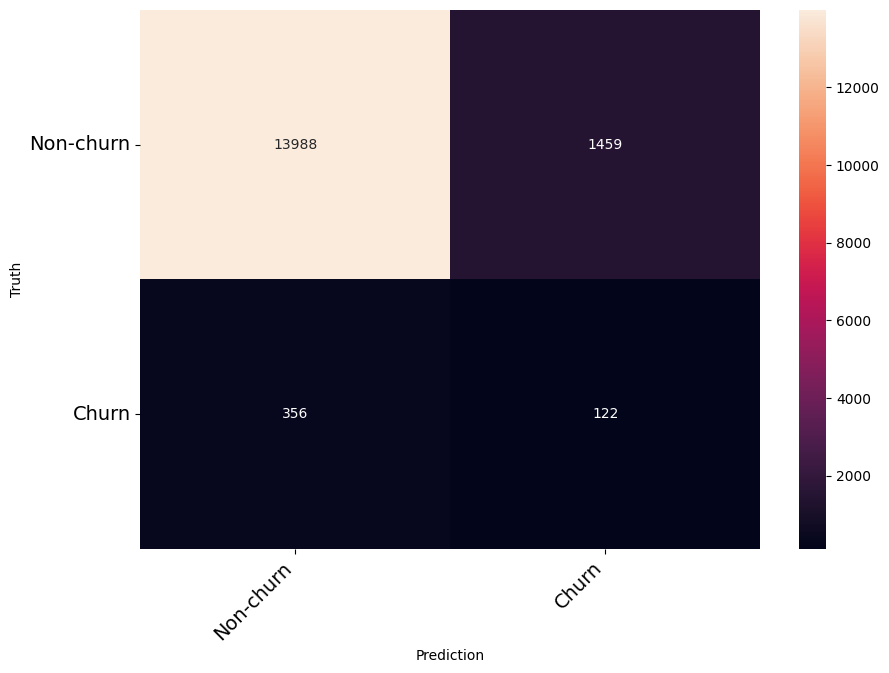

In [41]:
cm = confusion_matrix(y_test, y_pred)
print_confusion_matrix(cm,["Non-churn","Churn"])

In [74]:
model_log_regression =imbPipeline(steps=[('RemoveMissinVvalueCol',RemoveMissinVvalueCol(0.8)),
                                  ('preprocessor', preprocessor),
                        
                        ('o', over),
                    
                      ('classifier', LogisticRegression(random_state=0, C= 0.01,penalty ='l2' ,solver = 'sag', max_iter=1050))])

In [78]:
grid={'classifier__C':[0.01,0.001,0.0001],'classifier__penalty':['l2',"none"],"classifier__solver":["sag","saga"],"classifier__max_iter":[1000,1050,1100]}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [79]:
clf_log=GridSearchCV(model_log_regression,param_grid=grid,cv=cv,n_jobs=-1,scoring='f1_macro')
# clf.fit(X_train,y_train)


In [80]:
clf_log.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('RemoveMissinVvalueCol',
                                        RemoveMissinVvalueCol(treshold=0.8)),
                                       ('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('categoricaltransformer',
                                                                                          CategoricalTransformer()),
                                                                                         ('simpleimputer',
                                                                                          SimpleImputer(add_indicator=True,
                                                                                                        strategy='most_frequent...
                                                         

In [81]:
clf_log.best_params_

{'classifier__C': 0.0001,
 'classifier__max_iter': 1000,
 'classifier__penalty': 'l2',
 'classifier__solver': 'saga'}

In [82]:
pred_log=clf_log.predict(X_test)

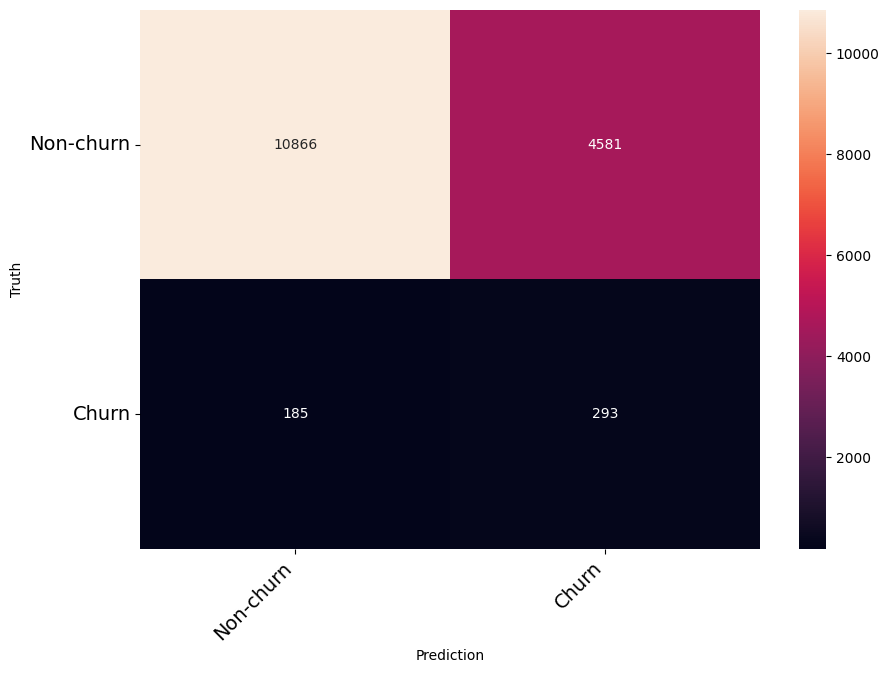

In [84]:
cm = confusion_matrix(y_test,pred_log)
print_confusion_matrix(cm,["Non-churn","Churn"])

In [85]:
print(classification_report(y_test,pred_log))

              precision    recall  f1-score   support

           0       0.98      0.70      0.82     15447
           1       0.06      0.61      0.11       478

    accuracy                           0.70     15925
   macro avg       0.52      0.66      0.46     15925
weighted avg       0.96      0.70      0.80     15925



In [86]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_log, pos_label=None)
print(metrics.auc(fpr, tpr))

0.6582041359942339


In [90]:
AdaBoostClassifier1 =imbPipeline(steps=[('RemoveMissinVvalueCol',RemoveMissinVvalueCol(0.8)),
                                  ('preprocessor', preprocessor),
                        
                        ('o', over),
                    
                      ('classifier', AdaBoostClassifier(random_state=99))])

In [100]:


parameters = {
  'classifier__n_estimators':[200,250,300,350,400],
  }


# initialize
clf_ada = GridSearchCV(AdaBoostClassifier1,parameters,cv=cv,Afwaswater12!,scoring='f1')
# fit



In [101]:
clf_ada.fit(X_train,y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('RemoveMissinVvalueCol',
                                        RemoveMissinVvalueCol(treshold=0.8)),
                                       ('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('categoricaltransformer',
                                                                                          CategoricalTransformer()),
                                                                                         ('simpleimputer',
                                                                                          SimpleImputer(add_indicator=True,
                                                                                                        strategy='most_frequent...
                                                         

In [102]:
clf_ada.best_params_


{'classifier__n_estimators': 200}

In [103]:
pred_ada=clf_ada.predict(X_test)

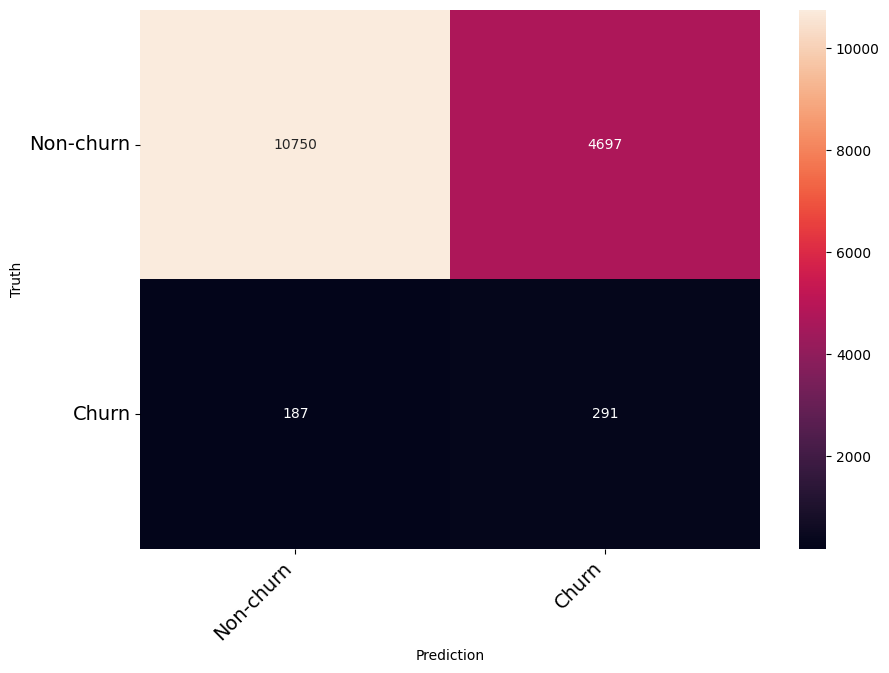

In [104]:
cm = confusion_matrix(y_test,pred_ada)
print_confusion_matrix(cm,["Non-churn","Churn"])

In [105]:
print(classification_report(y_test,pred_ada))

              precision    recall  f1-score   support

           0       0.98      0.70      0.81     15447
           1       0.06      0.61      0.11       478

    accuracy                           0.69     15925
   macro avg       0.52      0.65      0.46     15925
weighted avg       0.96      0.69      0.79     15925



In [117]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_ada, pos_label=None)
print(metrics.auc(fpr, tpr))

0.6523573113951796


In [109]:
easy= make_pipeline(RemoveMissinVvalueCol(0.8),preprocessor
                      ,EasyEnsembleClassifier(random_state=99,n_jobs=-1))

In [110]:
grid = {
  'easyensembleclassifier__n_estimators':[10,15,20,30,40,50,100,200],
  }

clf_easy=GridSearchCV(easy,param_grid=grid,cv=cv,n_jobs=-1,scoring='f1_macro')





In [111]:
clf_easy.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('removemissinvvaluecol',
                                        RemoveMissinVvalueCol(treshold=0.8)),
                                       ('columntransformer',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('categoricaltransformer',
                                                                                          CategoricalTransformer()),
                                                                                         ('simpleimputer',
                                                                                          SimpleImputer(add_indicator=True,
                                                                                                        strategy='most_fre...
                                                         

In [113]:
clf_easy.best_params_

{'easyensembleclassifier__n_estimators': 10}

In [114]:
pred_easy=clf_easy.predict(X_test)

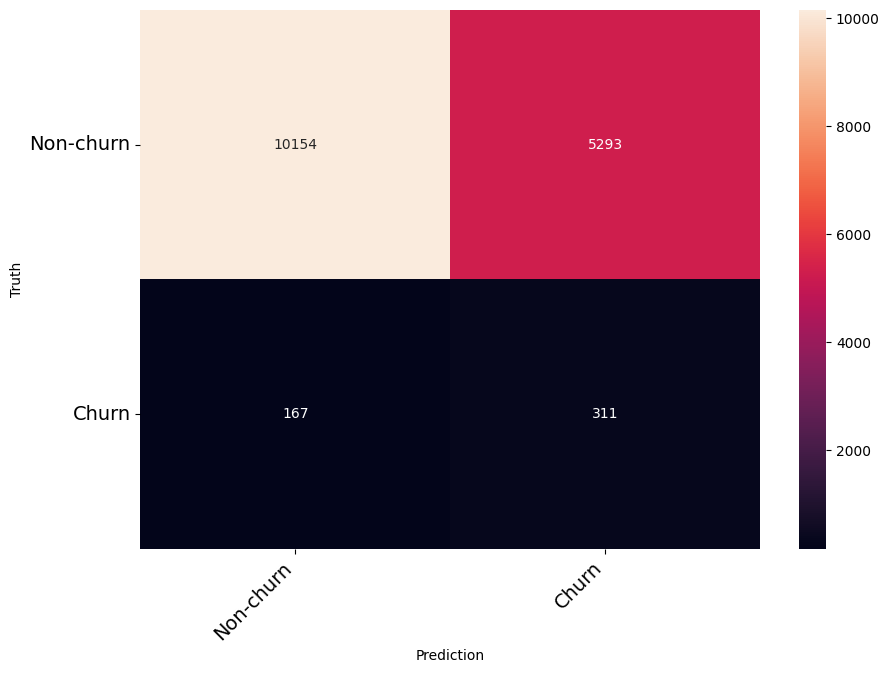

In [115]:
cm = confusion_matrix(y_test,pred_easy)
print_confusion_matrix(cm,["Non-churn","Churn"])

In [118]:
print(classification_report(y_test,pred_easy))

              precision    recall  f1-score   support

           0       0.98      0.66      0.79     15447
           1       0.06      0.65      0.10       478

    accuracy                           0.66     15925
   macro avg       0.52      0.65      0.45     15925
weighted avg       0.96      0.66      0.77     15925



In [119]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_easy, pos_label=None)
print(metrics.auc(fpr, tpr))

0.6539860416221427


In [120]:
y_pred_log = clf_log.predict_proba(X_test2)
   
# Dataframe which contains the results
pred = pd.DataFrame()
pred['ID'] = test_month_3['client_id']
    
pred['PROB'] = y_pred_log[:, 1]
    
print(pred)
    
#Export data
# pred.to_csv('test.csv', index = False)

                                     ID      PROB
0      ccf4cd93d5c32cd8a59809d54b4d53ac  0.476203
1      56605a660d18549592653ff6941186f1  0.440278
2      bda5f84c05e5695a7ec10550b457890f  0.721055
3      a2f1c04bc3acf2222e658a897400798f  0.389864
4      e83aadc3b0d25dbc12a35551afa25807  0.412742
...                                 ...       ...
27295  1a634b5cfe6dbf35e77ce6519c0e3939  0.574720
27296  84b7af2ddbeb919ab238ef7e6a83936c  0.430596
27297  c257c09e3f4445d67b52a1007b0205df  0.327213
27298  fdd7a1b7e58f642a1fc4867b8f7cdf3a  0.426519
27299  9b088b828fa94419c00175b6536857f9  0.429761

[27300 rows x 2 columns]


In [122]:
y_pred_ada = clf_ada.predict_proba(X_test2)
    
# Dataframe which contains the results
pred = pd.DataFrame()
pred['ID'] = test_month_3['client_id']
    
pred['PROB'] = y_pred_ada[:, 1]
    
print(pred)
    
#Export data
# pred.to_csv('test1.csv', index = False)

                                     ID      PROB
0      ccf4cd93d5c32cd8a59809d54b4d53ac  0.499844
1      56605a660d18549592653ff6941186f1  0.499812
2      bda5f84c05e5695a7ec10550b457890f  0.502403
3      a2f1c04bc3acf2222e658a897400798f  0.499282
4      e83aadc3b0d25dbc12a35551afa25807  0.499205
...                                 ...       ...
27295  1a634b5cfe6dbf35e77ce6519c0e3939  0.500813
27296  84b7af2ddbeb919ab238ef7e6a83936c  0.500413
27297  c257c09e3f4445d67b52a1007b0205df  0.499478
27298  fdd7a1b7e58f642a1fc4867b8f7cdf3a  0.500045
27299  9b088b828fa94419c00175b6536857f9  0.499836

[27300 rows x 2 columns]


In [123]:
y_pred_easy = clf_easy.predict_proba(X_test2)
    
# Dataframe which contains the results
pred = pd.DataFrame()
pred['ID'] = test_month_3['client_id']
    
pred['PROB'] = y_pred_easy[:, 1]
    
print(pred)
    
#Export data
# pred.to_csv('test1.csv', index = False)

                                     ID      PROB
0      ccf4cd93d5c32cd8a59809d54b4d53ac  0.501208
1      56605a660d18549592653ff6941186f1  0.499716
2      bda5f84c05e5695a7ec10550b457890f  0.509175
3      a2f1c04bc3acf2222e658a897400798f  0.497222
4      e83aadc3b0d25dbc12a35551afa25807  0.497105
...                                 ...       ...
27295  1a634b5cfe6dbf35e77ce6519c0e3939  0.503337
27296  84b7af2ddbeb919ab238ef7e6a83936c  0.499479
27297  c257c09e3f4445d67b52a1007b0205df  0.497753
27298  fdd7a1b7e58f642a1fc4867b8f7cdf3a  0.500034
27299  9b088b828fa94419c00175b6536857f9  0.499184

[27300 rows x 2 columns]


In [ ]:
# dict_of_models = {'Logisticregression': model,
#                   'AdaBoost' : easy,
#                  }

In [ ]:
# for name, model in dict_of_models.items():
#     print(name)
#     evaluation(model)